## Data Mining Project - Ventilator Pressure Prediction

### Data Acquisition

In [20]:
#testing for github desktop isit can directly push

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [22]:
train_data = pd.read_csv('train.csv')
train_data.head(20)
#print(train_data)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
5,6,1,20,50,0.169698,27.259866,0,12.867706
6,7,1,20,50,0.203708,27.127486,0,14.695562
7,8,1,20,50,0.237723,26.807732,0,15.890699
8,9,1,20,50,0.271776,27.864715,0,15.539188
9,10,1,20,50,0.305732,28.313036,0,15.750094


In [23]:
test_data = pd.read_csv('test.csv')
test_data.head(20)

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
5,6,0,5,20,0.159557,30.486938,0
6,7,0,5,20,0.191471,33.545950,0
7,8,0,5,20,0.223402,35.717600,0
8,9,0,5,20,0.255337,36.971061,0
9,10,0,5,20,0.287230,37.542219,0


In [24]:
# Missing Value
(train_data.astype(object) == '?').any()

id           False
breath_id    False
R            False
C            False
time_step    False
u_in         False
u_out        False
pressure     False
dtype: bool

In [25]:
# Missing Value
(test_data.astype(object) == '?').any()

id           False
breath_id    False
R            False
C            False
time_step    False
u_in         False
u_out        False
dtype: bool

In [26]:
# Check Data types
train_data.dtypes

id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
pressure     float64
dtype: object

In [27]:
# Check Data types
test_data.dtypes

id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
dtype: object

In [28]:
# duplicated rows
print(train_data.shape)
print(train_data.id.unique().shape)

(6036000, 8)
(6036000,)


In [29]:
print(test_data.shape)
print(test_data.id.unique().shape)

(4024000, 7)
(4024000,)


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


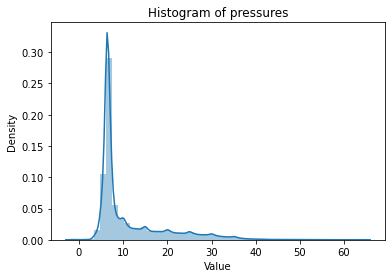

In [32]:
def histplot(vals, lab):
    # Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(train_data['pressure'])
histplot(train_data['pressure'], 'pressures')

The distribution of pressure is both quite skewed to the left and multimodal. Given the skew and the fact that there are no values less than or equal to zero, a log transformation might be appropriate.

The code in the cell below displays a histogram of the logarithm of pressures. Execute this code and examine the result.


C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


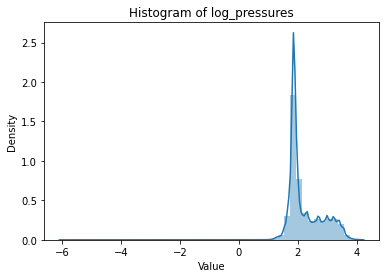

In [33]:
train_data['log_pressure'] = np.log(train_data['pressure'])
histplot(train_data['log_pressure'],'log_pressures')

The distribution of the logarithm of pressure has reduced some skewness, but still shows some multimodal tendency and skew. More improvement should be done.
To examine how the transformation change the relationship between the label and some of the features, we would execute the code in the cell below. 

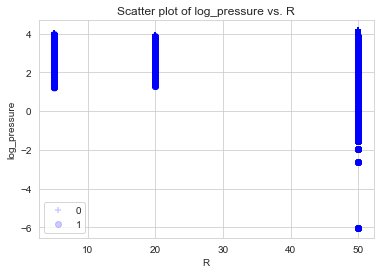

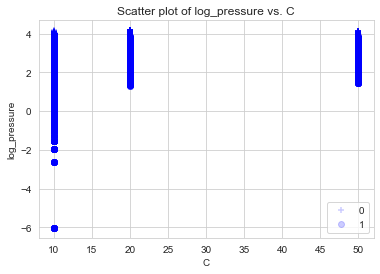

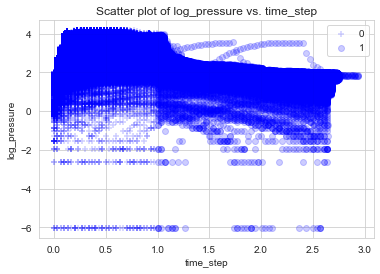

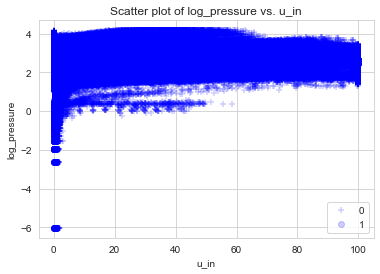

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
def plot_scatter_shape(train_data, cols, shape_col='u_out' , col_y = 'log_pressure', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = train_data[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = train_data[train_data[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['R', 'C', 'time_step', 'u_in']
plot_scatter_shape(train_data, num_cols)   